# **Used Cars Price Prediction**


## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

# **Part 1** 

### **Loading libraries**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Load the data**

In [2]:
data = pd.read_csv("used_cars.csv")

### **Understanding the data by observing a few rows**

In [3]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
# View last 5 rows 
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


### **Checking the data types and and missing values of each column** 

In [5]:
# Check the datatypes of each column. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
# Check total number of missing values of each column. 
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

 `S.No.` has no null values. The number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for analysis. Hence, it can be dropped.

In [7]:
# Remove S.No. column from data. 
data.drop("S.No.", axis=1, inplace=True)

## **Exploratory Data Analysis**

### **Exploring the summary statistics of numerical variables**

In [8]:
# Explore basic summary statistics of numeric variables. 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


### **Exploring the summary statistics of all categorical variables and the number of unique observations in each category**

In [9]:
# Explore basic summary statistics of categorical variables.  
data.describe(include= ['object']).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Number of unique observations in each category**

In [10]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].nunique())
    
    print('-'*50)

For column: Name
2041
--------------------------------------------------
For column: Location
11
--------------------------------------------------
For column: Fuel_Type
5
--------------------------------------------------
For column: Transmission
2
--------------------------------------------------
For column: Owner_Type
4
--------------------------------------------------


**Check Kilometers_Driven extreme values**

In [11]:
# Sorting the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values('Kilometers_Driven', ascending= False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so this value/entry from data can be removed.

In [12]:
# Removing the 'row' at index 2328 from the data. 
data.drop(index=2328, inplace=True)

**Check Mileage extreme values**

In [13]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values("Mileage", ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observation**
* Mileage of cars can not be 0, so treat 0's as missing values, in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. 

In [14]:
# Function to create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Plotting histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

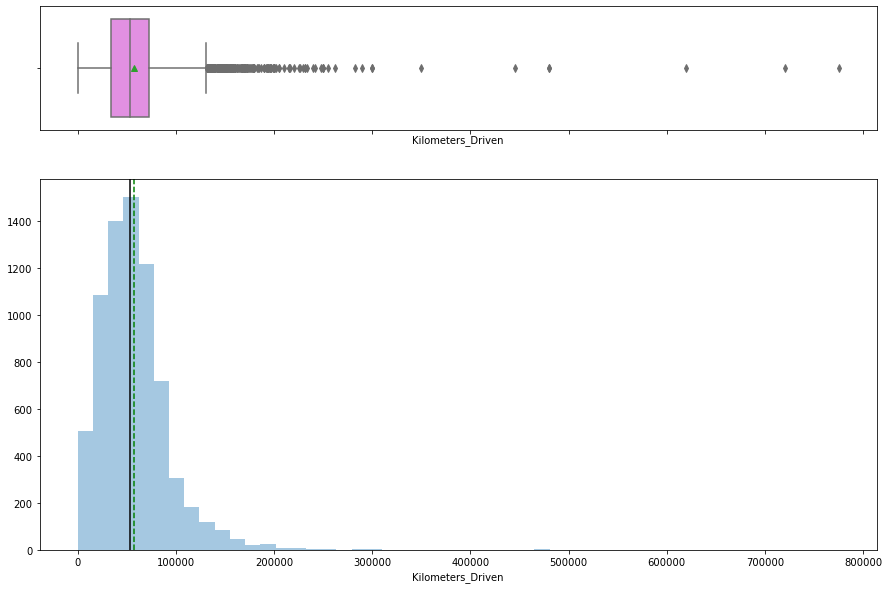

In [15]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

Kilometers_Driven is highly right-skewed, so use Log transformation of the feature to reduce/remove the skewness

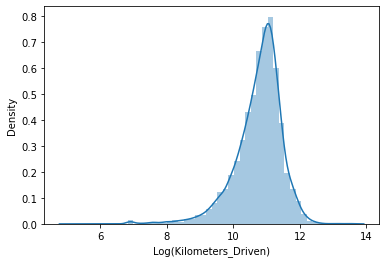

In [16]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

In [17]:
# Add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

Like Kilometers_Driven, the distribution of Price is also highly skewed, so log transformation is used on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. Naming the variable as **'price_log'**

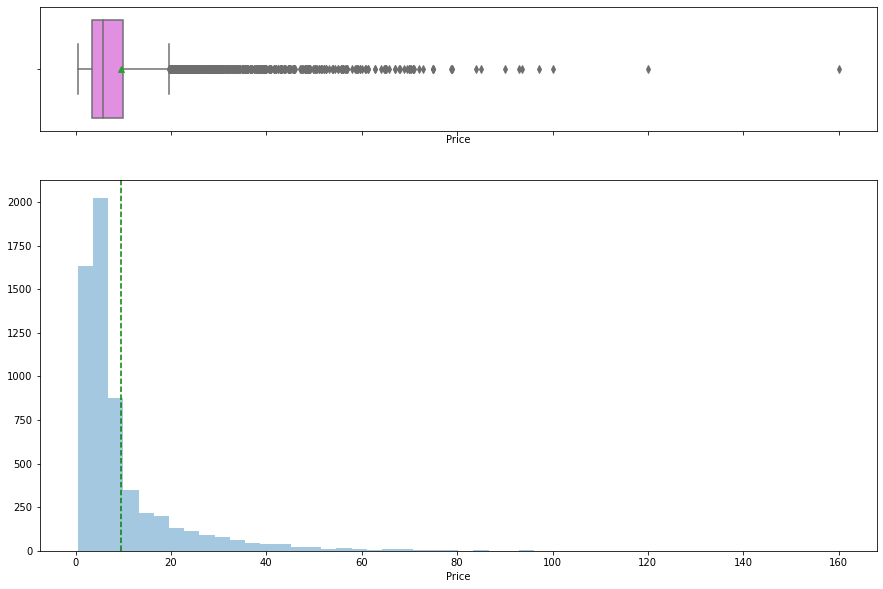

In [18]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

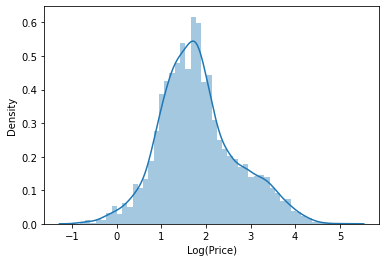

In [19]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");


In [20]:
# Adding a transformed Price feature in data
data["price_log"] = np.log(data["Price"])
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822


## **2. Univariate analysis - Categorical Data**

In [21]:
# Function to create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Barplot for the variable location, number of percentage of cars from each city.**

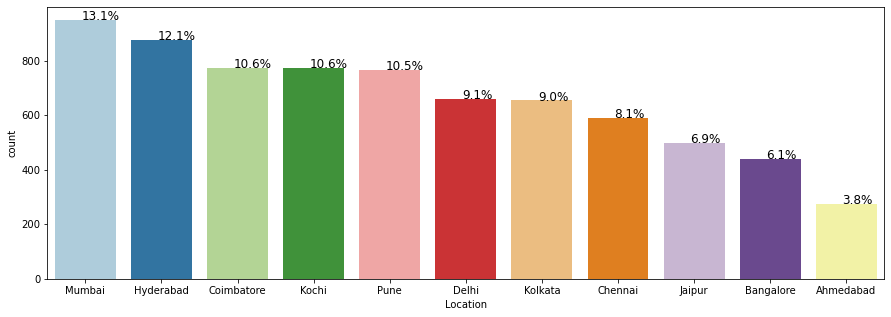

In [22]:
# Bar Plot for 'Location'
perc_on_bar('Location')

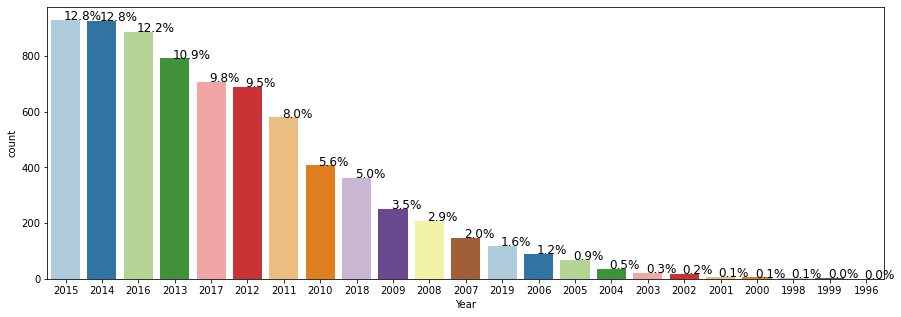

In [23]:
# Bar Plot for 'Year'
perc_on_bar('Year')

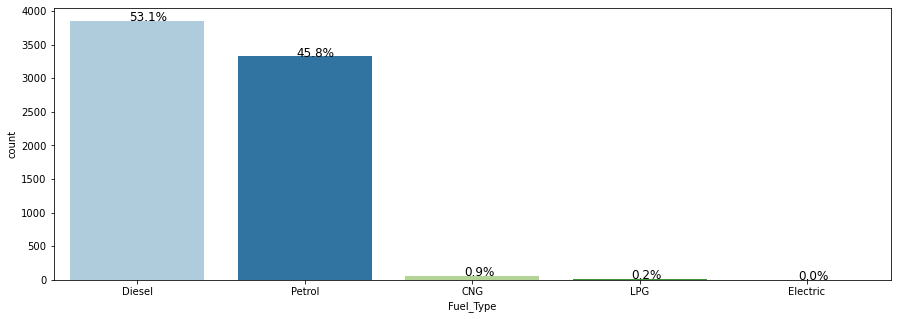

In [24]:
# Bar Plot for 'Fuel_Type'
perc_on_bar('Fuel_Type')

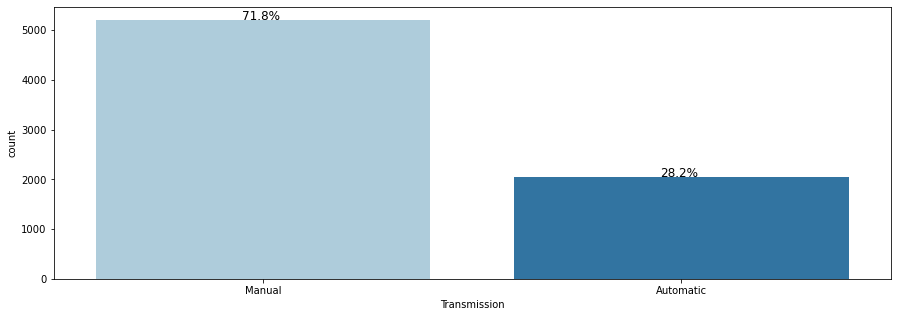

In [25]:
# Bar Plot for 'Transmission'
perc_on_bar('Transmission')

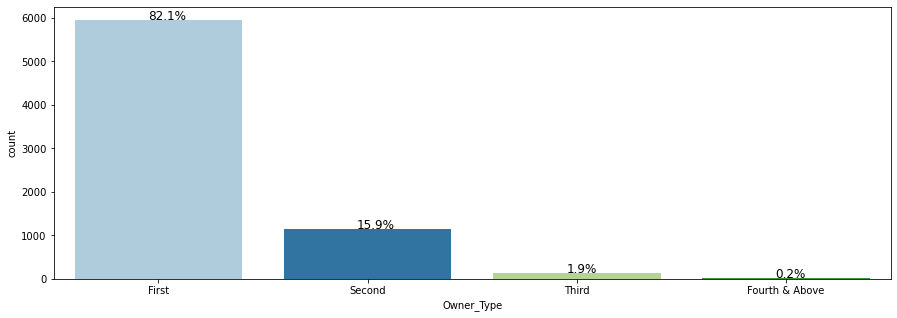

In [26]:
# Bar Plot for 'Owner_Type'
perc_on_bar('Owner_Type')

## **Bivariate Analysis**

### **1. Scatter plot**

Using log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='price_log'>

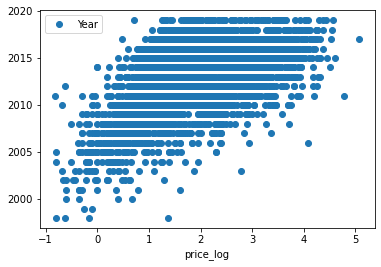

In [27]:
# Plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'price_log', y = 'Year', style = 'o')

<AxesSubplot:xlabel='price_log'>

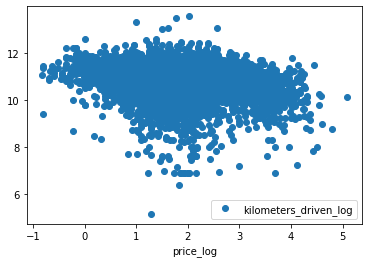

In [28]:
# Plot pair plot for the variables 'kilometers_driven_log' and 'price_log'
data.plot(x = 'price_log', y = 'kilometers_driven_log', style = 'o')

### **2. Heat map**


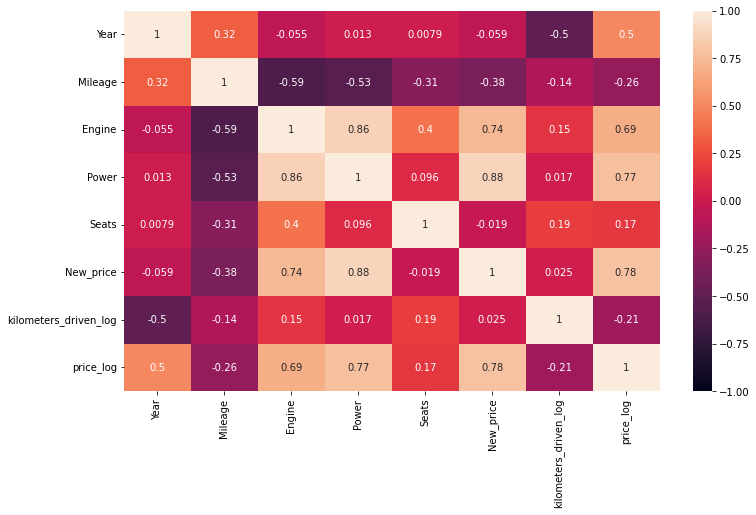

In [29]:
# Includes the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['Kilometers_Driven', "Price"],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

### **3. Box plot**

In [30]:
# Function that create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Plotting bivariate analysis of target variable with a categorical variable 'Location'

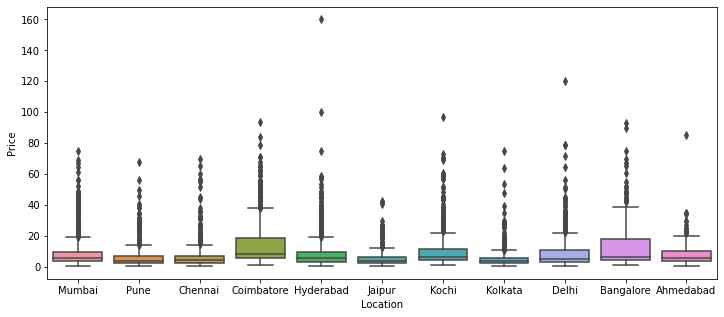

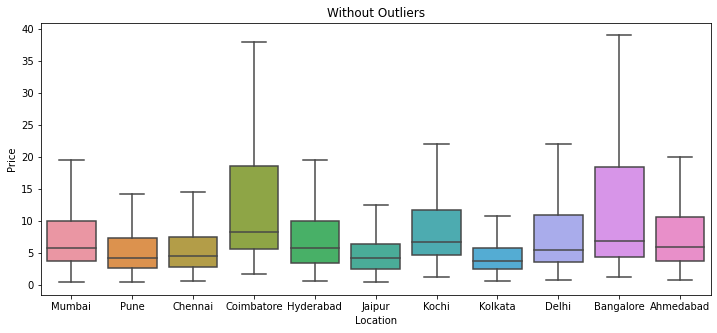

In [31]:
# Box Plot: Price vs Location
boxplot(data['Location'])

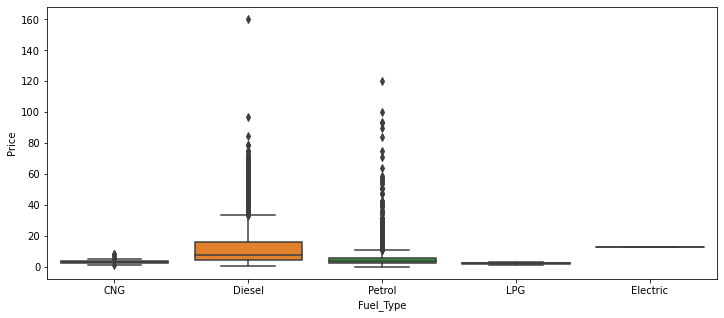

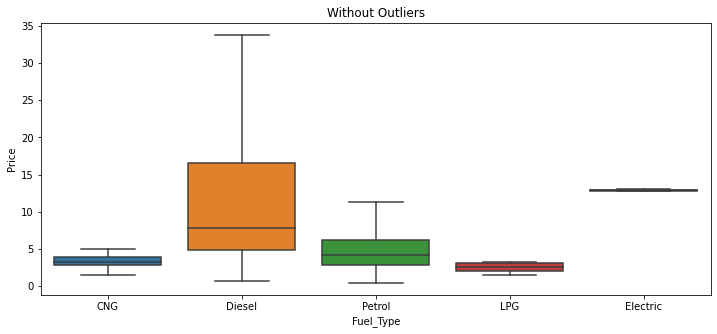

In [32]:
# Box Plot: Price vs Fuel_Type
boxplot(data['Fuel_Type'])

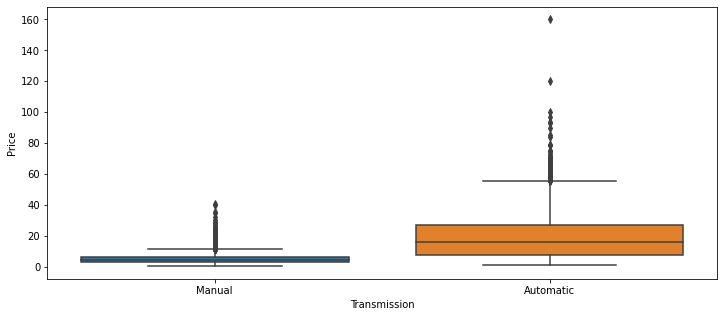

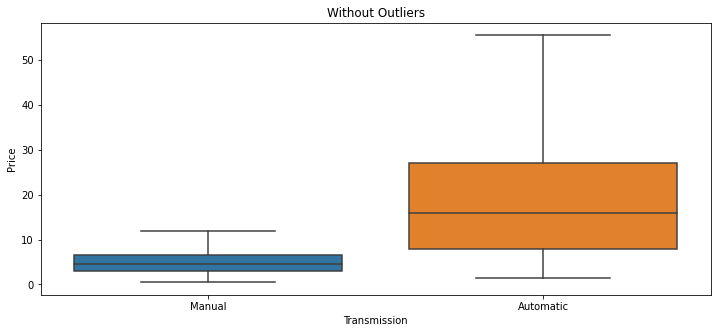

In [33]:
# Box Plot: Price vs Transmission
boxplot(data['Transmission'])

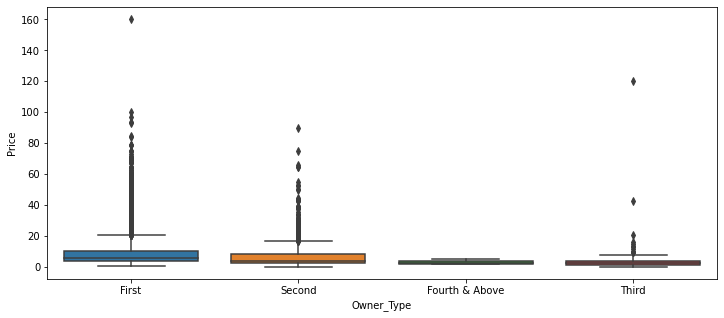

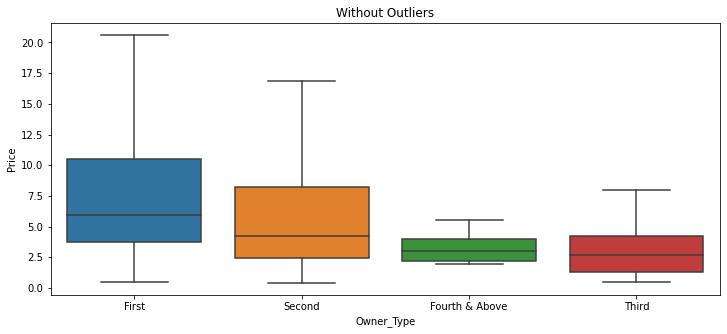

In [34]:
# Box Plot: Price vs Owner_Type
boxplot(data['Owner_Type'])

### **Feature Engineering**

With 2041 unique names, car names are not going to be great predictors of the price in current data. Process this column to extract important information, for example, brand name.

In [35]:
data['Name_Brand&Model'] = data['Name'].str.split().str.slice(0,2).str.join(sep=' ')

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Name_Brand&Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,Audi A4


### **Missing value treatment**

In [36]:
# Checking the missing values of each column.
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Name_Brand&Model            0
dtype: int64

**Missing values in Seats**

In [37]:
# Checking missing values in the column 'Seats'
data["Seats"].isnull().sum()

53

Imputing these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [38]:
# Impute missing values in Seats
data["Seats"]=data["Seats"].fillna(data.groupby(["Name_Brand&Model"])["Seats"].transform('median'))

# Check total number of missing values of the seat column to verify if they are imputed or not. 
data["Seats"].isnull().sum()

3

In [39]:
data.loc[data['Seats'].isnull()]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Name_Brand&Model
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50,10.933107,0.405465,Maruti Estilo
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,2.50,10.596635,0.916291,Maruti Estilo
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.75,10.839581,0.559616,Maruti Estilo


In [40]:
# researching Maruti Estilo LXI number of seats: 5
data["Seats"] = data["Seats"].fillna(5)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7252 non-null   object 
 1   Location               7252 non-null   object 
 2   Year                   7252 non-null   int64  
 3   Kilometers_Driven      7252 non-null   int64  
 4   Fuel_Type              7252 non-null   object 
 5   Transmission           7252 non-null   object 
 6   Owner_Type             7252 non-null   object 
 7   Mileage                7250 non-null   float64
 8   Engine                 7206 non-null   float64
 9   Power                  7077 non-null   float64
 10  Seats                  7252 non-null   float64
 11  New_price              1006 non-null   float64
 12  Price                  6018 non-null   float64
 13  kilometers_driven_log  7252 non-null   float64
 14  price_log              6018 non-null   float64
 15  Name

**Missing values for Mileage**

In [41]:
# Check missing values of each column. 
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Name_Brand&Model            0
dtype: int64

In [42]:
# Impute missing Mileage. For example, use median or any other methods.
data["Mileage"] = data["Mileage"].fillna(data["Mileage"].median())
 

**Missing values for Engine**

In [43]:
data["Engine"]=data["Engine"].fillna(data.groupby(["Name_Brand&Model"])["Engine"].transform('median'))


**Missing values for Power**

In [44]:
data["Power"]=data["Power"].fillna(data.groupby(["Name_Brand&Model"])["Power"].transform('median'))


**Missing values for New_price**

In [45]:
data["New_price"]=data["New_price"].fillna(data.groupby(["Name_Brand&Model"])["New_price"].transform('median'))


In [46]:
# Check total number of missing values to verify if they are imputed or not. 
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                      12
Seats                       0
New_price                1511
Price                    1234
kilometers_driven_log       0
price_log                1234
Name_Brand&Model            0
dtype: int64

In [47]:
data['Engine'] = data['Engine'].fillna(data['Engine'].median())
data['Power'] = data['Power'].fillna(data['Power'].median())
data['New_price'] = data['New_price'].fillna(data['New_price'].median())
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1234
kilometers_driven_log       0
price_log                1234
Name_Brand&Model            0
dtype: int64

In [48]:
data["Price"]=data["Price"].fillna(data.groupby(["Name_Brand&Model"])["Price"].transform('median'))
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                       7
kilometers_driven_log       0
price_log                1234
Name_Brand&Model            0
dtype: int64

In [49]:
data['Price'] = data['Price'].fillna(data['Price'].median())
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                       0
kilometers_driven_log       0
price_log                1234
Name_Brand&Model            0
dtype: int64

In [50]:
data["price_log"] = np.log(data["Price"])
data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
price_log                0
Name_Brand&Model         0
dtype: int64

In [51]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Name_Brand&Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,11.184421,0.559616,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,10.621327,2.525729,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,11.373663,1.791759,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,10.613246,2.875822,Audi A4


In [52]:
data_cleaned = data
data_cleaned.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Name_Brand&Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,11.184421,0.559616,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,10.621327,2.525729,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,11.373663,1.791759,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,10.613246,2.875822,Audi A4


### **Saving the Data**

In [53]:
data_cleaned.to_csv("cars_data_updated.csv", index = False)